In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h,k,c

In [2]:
#%%
#calculando a temperatura
tensao_res = [0.621, 0.675, 0.705, 0.747, 0.786]
tensao_lamp = [8.01, 9, 9.89, 11.12, 12.31]
res_resistor = 1
temp0 = 21.1+273
wien = 2.898e-3

corrente = np.divide(tensao_res,res_resistor) #tensao_res/res_resistor
res_lampada = np.divide(tensao_lamp,corrente) #tensao_lamp /corrente

temp = (temp0 * np.power((res_lampada/res_resistor),(1/1.24)))+273

In [5]:
#%%
# defining plank function

def planck_func(x,norm,t,fund):
    return norm*((8*np.pi*h*c)/np.power(x,5))*(1/(np.exp((h*c)/(x*k*t))-1))+fund

In [6]:
#%%
#lendo os dados
data = [None]*5
mask = [None]*5
x = [None]*5
y = [None]*5
sigma_y = [None]*5
fundo = [None]*5
ans = [None]*5
cov = [None]*5
y_fit = [None]*5
fitted_df = [None]*5
peak = [None]*5
temperatura = [None]*5

ini_guess = [4e-3,4e-3,4e-3,4e-6,4e-6]

for i in range(1,6):
    filename = "dataset/CN_Eq1_m6_{}.txt".format(i)
    data[i-1] = pd.read_csv(filename,skiprows = 2,header = None, delimiter = '\t', names=['voltasMP','intensidade'])

    data[i-1] = data[i-1].apply(lambda x: x.str.replace(',','.'))

    data[i-1]['voltasMP'] = pd.to_numeric(data[i-1]['voltasMP'], errors = 'coerce')
    data[i-1]['intensidade'] = pd.to_numeric(data[i-1]['intensidade'], errors = 'coerce')

    mask[i-1] = data[i-1]['voltasMP']>400

    x[i-1] = data[i-1]['voltasMP'][mask[i-1]]
    y[i-1] = data[i-1]['intensidade'][mask[i-1]]

    x[i-1]= (x[i-1]/60)*(np.pi/180)
    x[i-1]= (0.001/300)*np.sin(x[i-1])

    fundo[i-1] = y[i-1].min()
    
    sigma_y[i-1] = np.sqrt(y[i-1])

    ans[i-1], cov[i-1] = curve_fit(planck_func, x[i-1], y[i-1], p0=[ini_guess[i-1],temp[i-1],fundo[i-1]])

    y_fit[i-1] = planck_func(x[i-1],*ans[i-1])

    fitted_df[i-1] = pd.DataFrame({'wavelenght':x[i-1], 'R':y[i-1], 'fit':y_fit[i-1]})

    peak[i-1] = fitted_df[i-1].loc[fitted_df[i-1]['fit'] == fitted_df[i-1]['fit'].max()]

    temperatura[i-1] = np.divide(wien,peak[i-1]['wavelenght'])

/home/hpereira/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hpereira/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hpereira/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hpereira/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hpereira/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/hpereira/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/hpereira/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


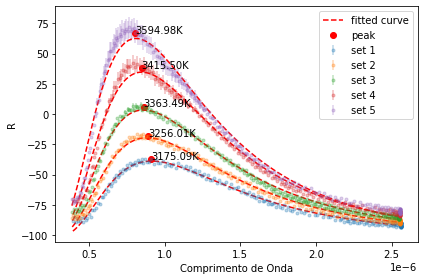

In [7]:
#%%
fig, ax1 = plt.subplots()


ax1.errorbar(x[0],y[0], yerr = sigma_y[0], fmt = '.', label = 'set 1', alpha = 0.3)
ax1.errorbar(x[1],y[1], yerr = sigma_y[1], fmt = '.', label = 'set 2', alpha = 0.3)
ax1.errorbar(x[2],y[2], yerr = sigma_y[2], fmt = '.', label = 'set 3', alpha = 0.3)
ax1.errorbar(x[3],y[3], yerr = sigma_y[3], fmt = '.', label = 'set 4', alpha = 0.3)
ax1.errorbar(x[4],y[4], yerr = sigma_y[4], fmt = '.', label = 'set 5', alpha = 0.3)

ax1.plot(x[0],y_fit[0], '--', color ='red', label = 'fitted curve')
ax1.plot(x[1],y_fit[1], '--', color ='red')
ax1.plot(x[2],y_fit[2], '--', color ='red')
ax1.plot(x[3],y_fit[3], '--', color ='red')
ax1.plot(x[4],y_fit[4], '--', color ='red')

ax1.plot(peak[0]['wavelenght'],peak[0]['R'],'o', color = 'red', label = 'peak')
ax1.plot(peak[1]['wavelenght'],peak[1]['R'],'o', color = 'red')
ax1.plot(peak[2]['wavelenght'],peak[2]['R'],'o', color = 'red')
ax1.plot(peak[3]['wavelenght'],peak[3]['R'],'o', color = 'red')
ax1.plot(peak[4]['wavelenght'],peak[4]['R'],'o', color = 'red')

text = [None]*5
for i, temp in enumerate(temperatura):
    text[i] = '{:.2f}K'.format(temp.values[0])
    
ax1.annotate(text[0] ,(peak[0]['wavelenght'],peak[0]['R']))
ax1.annotate(text[1] ,(peak[1]['wavelenght'],peak[1]['R']))
ax1.annotate(text[2] ,(peak[2]['wavelenght'],peak[2]['R']))
ax1.annotate(text[3] ,(peak[3]['wavelenght'],peak[3]['R']))
ax1.annotate(text[4] ,(peak[4]['wavelenght'],peak[4]['R']))

plt.xlabel("Comprimento de Onda")
plt.ylabel("R")
plt.legend(loc='upper right')

fig.tight_layout()

plt.savefig("exp1_alldata.jpeg", dpi = 300)
plt.show()